In [74]:
# loding libaries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score


# **Part A: Data prepression** 

In [75]:
# loding file 
#link: https://drive.google.com/file/d/1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf/view?usp=sharing
#link: https://drive.google.com/file/d/1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs/view?usp=sharing
file1='1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf'
file2='1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs'
url1=f"https://drive.google.com/uc?export=download&id={file1}"
url2=f"https://drive.google.com/uc?export=download&id={file2}"
sentiment = pd.read_csv(url1)
historical=pd.read_csv(url2)

In [76]:
# info and first 5 rows 
sentiment.info()
sentiment.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [77]:
# info and head 
historical.info()
historical.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [78]:
# cheking null and duplicated on sentiment 
sentiment.isnull().sum()
sentiment.duplicated().sum()

0

In [79]:
# checking null and duplicated on hestorical data
historical.isnull().sum()
historical.duplicated().sum()

0

In [80]:
sentiment['date'].nunique()

2644

In [81]:
# creating new date column and changeing to date time 
historical['date'] = pd.to_datetime(historical['Timestamp IST'], dayfirst=True)
historical['date'] = historical['date'].dt.date
# changing datetime from object
sentiment['date']=pd.to_datetime(sentiment['date']).dt.date

In [82]:
# combning two datasets by merge
bitcoin = historical.merge(sentiment[['date','value','classification']], on='date', how='left')

In [83]:
# removing or not using unnecessary columns
bitcoin = bitcoin.drop(columns=['Account','Transaction Hash','Order ID','Timestamp'])


In [84]:
# checking info,head,null and duplicated
bitcoin.info()
bitcoin.head()
#bitcoin.isnull().sum()
#bitcoin.duplicated().sum()
# bitcoin[bitcoin.duplicated()] # clearly the 2 are not simmilar columns or duplicate at all

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Coin             211224 non-null  object 
 1   Execution Price  211224 non-null  float64
 2   Size Tokens      211224 non-null  float64
 3   Size USD         211224 non-null  float64
 4   Side             211224 non-null  object 
 5   Timestamp IST    211224 non-null  object 
 6   Start Position   211224 non-null  float64
 7   Direction        211224 non-null  object 
 8   Closed PnL       211224 non-null  float64
 9   Crossed          211224 non-null  bool   
 10  Fee              211224 non-null  float64
 11  Trade ID         211224 non-null  float64
 12  date             211224 non-null  object 
 13  value            211218 non-null  float64
 14  classification   211218 non-null  object 
dtypes: bool(1), float64(8), object(6)
memory usage: 22.8+ MB


,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,Trade ID,date,value,classification
0,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,True,0.345404,8.950000e+14,2024-12-02,80.0,Extreme Greed
1,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,True,0.005600,4.430000e+14,2024-12-02,80.0,Extreme Greed
2,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,True,0.050431,6.600000e+14,2024-12-02,80.0,Extreme Greed
3,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,True,0.050043,1.080000e+15,2024-12-02,80.0,Extreme Greed
4,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,True,0.003055,1.050000e+15,2024-12-02,80.0,Extreme Greed


In [85]:
# statics data
bitcoin.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Fee,Trade ID,value
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,211224.000000,2.112240e+05,211218.000000
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,1.163967,5.628549e+14,51.649656
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,6.758854,3.257565e+14,21.012784
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,-1.175712,0.000000e+00,10.000000
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,0.016121,2.810000e+14,33.000000
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,0.089578,5.620000e+14,49.000000
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,0.393811,8.460000e+14,72.000000
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,837.471593,1.130000e+15,94.000000


### Extreme values represent high-volume trades and liquidation events, which are critical for market microstructure analysis. Removing them would bias volatility and liquidity estimation.

In [86]:
# filling mising values
#bitcoin['value'] = bitcoin['value'].fillna(bitcoin['value'].median())
#bitcoin['classification'] = bitcoin['classification'].fillna(bitcoin['classification'].mode()[0])


In [87]:
skew_num = bitcoin[['Execution Price','Size Tokens','Size USD','Start Position','Closed PnL', 'Fee']].skew()
print(skew_num)

Execution Price     2.299416
Size Tokens        70.140217
Size USD           43.777448
Start Position     -8.684498
Closed PnL         30.699415
Fee                35.534255
dtype: float64


In [88]:
# clearly skew>1 right skew and skew<-1 left skew, means some values influnce the whole data if use mean(), that why use median

In [89]:
cat_col=bitcoin.select_dtypes(include='object').columns
bitcoin[cat_col].value_counts(normalize=True)

Coin   Side  Timestamp IST     Direction    date        classification
@107   SELL  14-02-2025 00:31  Sell         2025-02-14  Neutral           0.002088
HYPE   BUY   25-02-2025 05:23  Open Long    2025-02-25  Fear              0.002045
       SELL  07-03-2025 20:39  Close Long   2025-03-07  Fear              0.001780
ETH    BUY   03-03-2025 12:25  Close Short  2025-03-03  Fear              0.001733
HYPE   BUY   24-02-2025 13:36  Open Long    2025-02-24  Neutral           0.001700
                                                                            ...   
FTT    SELL  17-12-2024 11:50  Open Short   2024-12-17  Extreme Greed     0.000005
             17-12-2024 11:47  Open Short   2024-12-17  Extreme Greed     0.000005
             17-12-2024 08:39  Open Short   2024-12-17  Extreme Greed     0.000005
             17-01-2025 22:48  Open Short   2025-01-17  Extreme Greed     0.000005
kSHIB  SELL  29-02-2024 22:53  Close Long   2024-02-29  Extreme Greed     0.000005
Name: proportion

In [90]:
# creating daily based dataset 
bitcoin['Direction'] = bitcoin['Direction'].str.lower()
long_label=['buy','open long','close short']
short_label=['sell','open short','close long']
bitcoin['in_long'] = bitcoin['Direction'].isin(long_label).astype(int)
bitcoin['in_short'] = bitcoin['Direction'].isin(short_label).astype(int)
daily_bitcoin = bitcoin.groupby(['date','classification']).agg(
    daily_pnl=('Closed PnL','sum'),
    trades_per_day=('Trade ID','count'),
    avg_trade_size=('Size USD','mean'),
    win_rate=('Closed PnL', lambda x: (x>0).mean()),
    long_trades=('in_long','sum'),
    short_trades=('in_short','sum')
).reset_index()

daily_bitcoin['long_short_ratio'] = daily_bitcoin['long_trades'] / (daily_bitcoin['short_trades'] + 1).replace([-np.inf, np.inf],np.nan).fillna(0)

In [91]:
skew_num = daily_bitcoin[daily_bitcoin.select_dtypes(include=np.number).columns].skew()
print(skew_num)

daily_pnl           3.735067
trades_per_day      3.369138
avg_trade_size      1.695338
win_rate            0.453503
long_trades         4.730397
short_trades        2.666227
long_short_ratio    6.737195
dtype: float64


In [92]:
print(daily_bitcoin['short_trades'])
print(daily_bitcoin['long_trades'])
print(daily_bitcoin.info())

0         0
1         2
2         6
3         0
4         0
       ... 
474     128
475     727
476    1138
477     275
478     542
Name: short_trades, Length: 479, dtype: int32
0         3
1         7
2         5
3         2
4         3
       ... 
474     209
475     652
476    1105
477     837
478     685
Name: long_trades, Length: 479, dtype: int32
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              479 non-null    object 
 1   classification    479 non-null    object 
 2   daily_pnl         479 non-null    float64
 3   trades_per_day    479 non-null    int64  
 4   avg_trade_size    479 non-null    float64
 5   win_rate          479 non-null    float64
 6   long_trades       479 non-null    int32  
 7   short_trades      479 non-null    int32  
 8   long_short_ratio  479 non-null    float64
dtypes: float64(4), int3

# **Part-B**

In [93]:
daily_bitcoin.groupby('classification')[['daily_pnl','win_rate']].mean()

,daily_pnl,win_rate
classification,,
Extreme Fear,52793.589178,0.327341
Extreme Greed,23817.292199,0.467424
Fear,36891.818040,0.329112
Greed,11140.566181,0.335986
Neutral,19297.323516,0.331886


In [94]:
daily_bitcoin.groupby('classification')[['trades_per_day', 'avg_trade_size', 'long_short_ratio']].mean()

,trades_per_day,avg_trade_size,long_short_ratio
classification,,,
Extreme Fear,1528.571429,4091.804366,1.160937
Extreme Greed,350.807018,4410.524482,1.687277
Fear,679.527473,6524.294937,4.118762
Greed,260.637306,6735.295813,2.941346
Neutral,562.477612,7157.527121,3.320639


# **Data-driven Insides**
# 1) In extreme fear daily pnl is high(52793.6) and lowest win ratio (32%), but extreme greed hidher(46%) win ratio and lowest pnl on greed(11140.56).
# 2) In extreme fear most trade happen and lowest avg trade size and lowest long short value(liquidit) and most 2nd traders per day higher long(buyers) , but nutral higest avg trade size(7157.5) and 2nd most long shor ratio(higher buyyers)

# **Inside**
# 1) Traders win more often in greed, but make more money in fear.
# 2) Traders trade mostly in extreme fear, but avoid trading in greed.
# 3 In fear, traders go aggressive long, but extreme fear traders are balanced

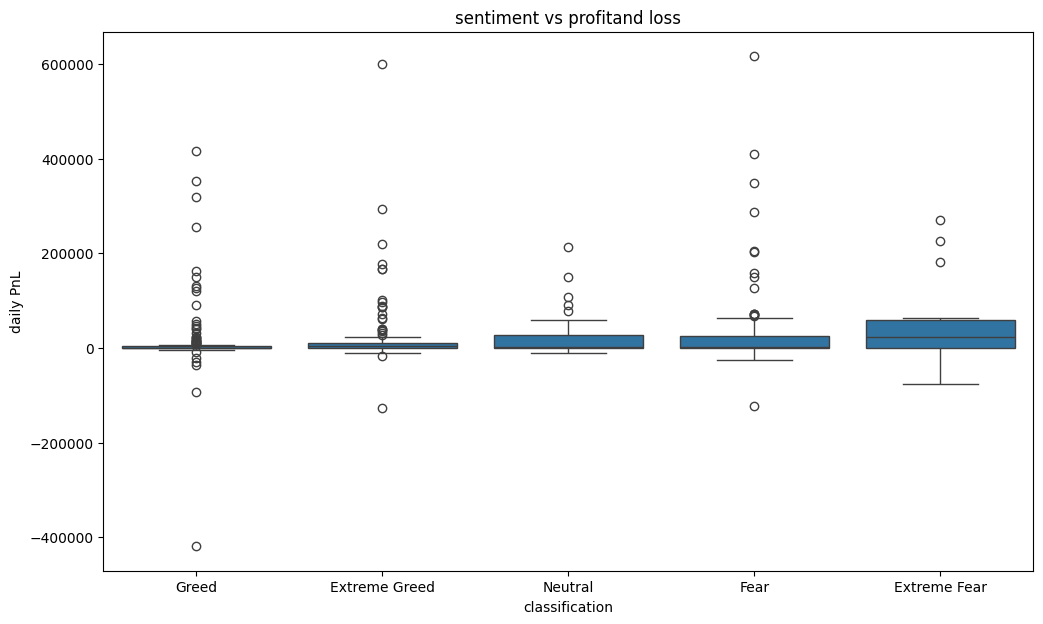

In [95]:
# graph representation of sentement of trading day vs profit and loss
plt.figure(figsize=(12,7))
sns.boxplot(daily_bitcoin, x='classification', y='daily_pnl')
plt.title('sentiment vs profitand loss')
plt.xlabel('classification')
plt.ylabel('daily PnL')
plt.show()

# Greed and extreme greed most of the time result in the majority of traders losing, while a few make a profit. Conversely, extreme fear results in most traders making a profit.
 

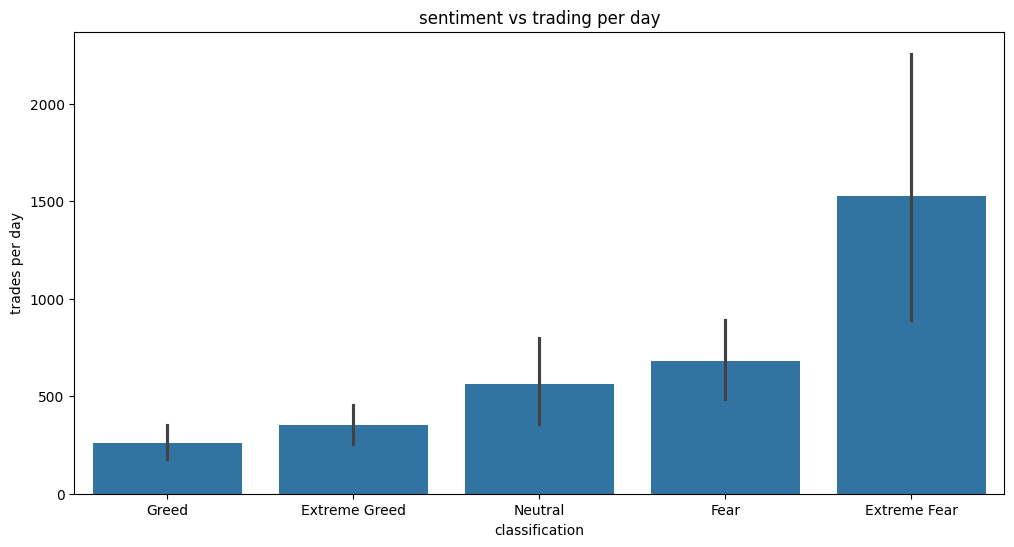

In [96]:
#graphical representation of sentiment vs  trade per day
plt.figure(figsize=(12,6))
sns.barplot(daily_bitcoin, x='classification',y='trades_per_day')
plt.title('sentiment vs trading per day')
plt.xlabel('classification')
plt.ylabel('trades per day')
plt.show()


# Majority of the traders come or trade on extreme fear & fear, and the lowest numbers of traders on greed and the 2nd lowest on extreme greed 

# 

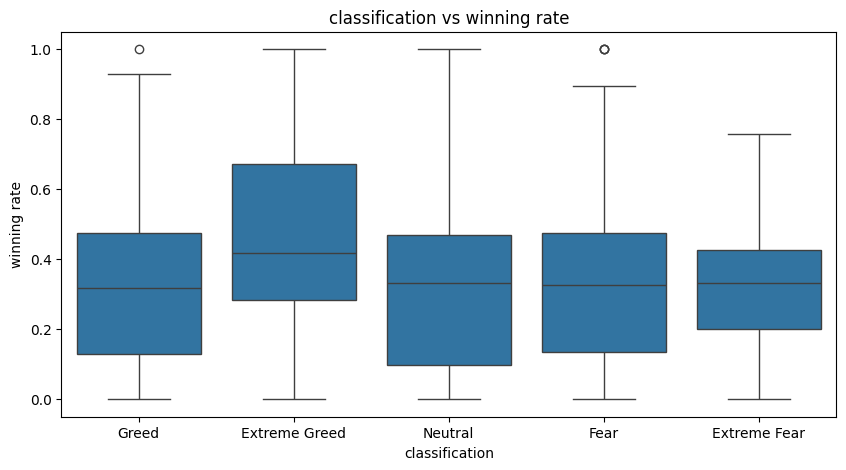

In [97]:
# graphical represent of sentiment vs wining rate
plt.figure(figsize=(10,5))
sns.boxplot(daily_bitcoin, x='classification', y='win_rate')
plt.title('classification vs winning rate')
plt.xlabel('classification')
plt.ylabel('winning rate')
plt.show()



## The highest winning ratio top extreme greed (most  40% to 70%), and at the lowest is neutral with (most 30% to 10%)


# **Part-C**

# Business solution  to improvement
# 1) In greed & extreme greed day, apply stop-loss and reduce funds
# 2) trade should only be excludet only when technical and sentimental signals align and examples indicaters like rsi, MDA20, MDA100, and ect.
# 3) Avoid holding long positions for extended periods when they fail to show fundamental improvement in profitability. Such trades are typically driven by speculation rather than strong financial performance and should be deprioritized.

# **Part-D(Bonus)**

In [98]:
# creating tardet features 
daily_bitcoin = daily_bitcoin.sort_values('date')

daily_bitcoin['next_day_pnl'] = daily_bitcoin['daily_pnl'].shift(-1)

daily_bitcoin['pnl_bucket'] = pd.cut(daily_bitcoin['next_day_pnl'],bins=[-1e9, -1, 1, 1e9],labels=['Loss','Neutral','Profit'])

In [99]:
daily_bitcoin.isnull().sum()

date                0
classification      0
daily_pnl           0
trades_per_day      0
avg_trade_size      0
win_rate            0
long_trades         0
short_trades        0
long_short_ratio    0
next_day_pnl        1
pnl_bucket          1
dtype: int64

In [100]:
# drop null value
daily_bitcoin=daily_bitcoin.dropna(subset=['next_day_pnl', 'pnl_bucket'])
daily_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478 entries, 0 to 477
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   date              478 non-null    object  
 1   classification    478 non-null    object  
 2   daily_pnl         478 non-null    float64 
 3   trades_per_day    478 non-null    int64   
 4   avg_trade_size    478 non-null    float64 
 5   win_rate          478 non-null    float64 
 6   long_trades       478 non-null    int32   
 7   short_trades      478 non-null    int32   
 8   long_short_ratio  478 non-null    float64 
 9   next_day_pnl      478 non-null    float64 
 10  pnl_bucket        478 non-null    category
dtypes: category(1), float64(5), int32(2), int64(1), object(2)
memory usage: 37.9+ KB


In [101]:
skew_num = daily_bitcoin[daily_bitcoin.select_dtypes(include=np.number).columns].skew()
print(skew_num)

daily_pnl           3.736376
trades_per_day      3.379894
avg_trade_size      1.697454
win_rate            0.454667
long_trades         4.746381
short_trades        2.672530
long_short_ratio    6.729793
next_day_pnl        3.730412
dtype: float64


In [102]:

# dividing into inputand output datas
column= ['trades_per_day', 'avg_trade_size', 'win_rate', 'long_short_ratio','classification']
X= daily_bitcoin[column]
y= daily_bitcoin['pnl_bucket']
# splitting train and test  and ml model deploy
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)
# log transformation 
skew_col = X_train.select_dtypes(include=np.number).columns
for col in skew_col:
    X_train[col]=np.log1p(X_train[col])
    X_test[col]=np.log1p(X_test[col])
# encoder
oe = OrdinalEncoder()
X_train['classification']=oe.fit_transform(X_train[['classification']])
X_test['classification']=oe.transform(X_test[['classification']])
# null or duplicated
print(y_test.isnull().sum())
print(X_test.isnull().sum())

# encoding ffor out put data
le=LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

0
trades_per_day      0
avg_trade_size      0
win_rate            0
long_short_ratio    0
classification      0
dtype: int64


In [103]:
# model deployment  
# Logistics regression on ML Model of Classification 
lr=LogisticRegression(random_state=42,max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)
y_pre = lr.predict(X_test)
y_pred=lr.predict_proba(X_test)
y_pro = (y_pred>0.2).astype(int)
print(f'classification report:{classification_report(y_test,y_pre)}')
print(f"roc auc score:{roc_auc_score(y_test, y_pred, multi_class='ovr')}")


classification report:              precision    recall  f1-score   support

           0       0.20      0.25      0.22        12
           1       0.23      0.58      0.33        12
           2       0.88      0.61      0.72        72

    accuracy                           0.56        96
   macro avg       0.44      0.48      0.42        96
weighted avg       0.71      0.56      0.61        96

roc auc score:0.6572696208112875


In [104]:
# random orest for differensheat
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train,y_train)
y_pre=rf.predict(X_test)
y_pred=rf.predict_proba(X_test)

print(f'classification report:{classification_report(y_test,y_pre)}')
print(f"roc auc score:{roc_auc_score(y_test,y_pred, multi_class='ovr')}")


classification report:              precision    recall  f1-score   support

           0       0.50      0.08      0.14        12
           1       0.00      0.00      0.00        12
           2       0.76      0.99      0.86        72

    accuracy                           0.75        96
   macro avg       0.42      0.36      0.33        96
weighted avg       0.64      0.75      0.66        96

roc auc score:0.6236083553791887


## While Random Forest achieved higher overall accuracy (0.75), it showed severe bias toward the majority class (Profit) and failed to identify Loss and Neutral days.

## Logistic Regression with class balancing provided lower accuracy (0.56) but significantly improved recall for minority classes and achieved higher macro F1-score and ROC-AUC.

# model Logistic Regression performs well good on a small dataset, not random guessing at all